# The fields of economists on DBpedia

In [27]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import pprint
import sparql_dataframe
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats
import pandas as pd
from collections import Counter
from operator import itemgetter
import urllib.request
import json

from statsmodels.graphics.mosaicplot import mosaic

In [8]:
query = """

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?economist ?name ?field (year(xsd:dateTime(?Birth_Date)) AS ?Year)

WHERE { ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ##   ?economist owl:sameAs ?sameAs .  ### FB: cette contrainte ne me paraît pas nécessaire ?
        ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)

  FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  FILTER (str(?field) != "")
}
ORDER BY ?Year
"""

In [9]:
sparql = SPARQLWrapper("https://live.dbpedia.org/sparql")

In [10]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [11]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [12]:
# Number of rows in the result
len(rc['results']['bindings'])

97

In [13]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 3:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Léon_Walras'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Léon Walras'}, 'field': {'type': 'literal', 'value': 'Economics'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1834'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Léon_Walras'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Léon Walras'}, 'field': {'type': 'literal', 'value': 'Marginalism'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1834'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Eugen_Böhm_von_Bawerk'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Eugen Böhm von Bawerk'}, 'field': {'type': 'literal', 'value': 'Political economics'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1851'}}


In [14]:
# Extract the values from the first five rows
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 : ## 5:
        try: 
            name = l['name']['value']
            result.append([l['field']['value'],l['Year']['value']])
        except Exception as e :
            print(e)
            try: 
                name = l['prefLabel']['value']
                result.append([l['field']['value'],l['Year']['value']])
            except Exception as e:
                print(e)
                result.append([l['field']['value'],l['Year']['value']])

        i += 1

In [52]:
df = pd.DataFrame(result, columns=['field', 'year'])

In [50]:
pd.crosstab(df["field"], df["year"])

year,1834,1851,1873,1885,1899,1901,1906,1910,1921,1924,...,1965,1966,1967,1970,1971,1974,1975,1984,1985,1988
field,,,,,,,,,,,,,,,,,,,,,
Behavioral economics,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Column writer : Banglatribune,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Criminology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Culture,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Development Economics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Development economics,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
Econometrics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Economic History,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Economic history,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df['years'] = df.groupby(['field'])['year'].transform(lambda x : ' '.join(x))
df['count'] = df.groupby(['field']).count() 
  
# drop duplicate data 
df = df.drop_duplicates()    
  
# show the dataframe 

df.head(10)

,field,year,years,count
0,Economics,1834,1834 1899 1910 1925 1930 1932 1941 1943 1944 1...,NaN
1,Marginalism,1834,1834,NaN
2,Political economics,1851,1851 1956,NaN
3,Social economics,1873,1873,NaN
4,Macroeconomics,1885,1885 1899 1925 1942 1948 1950 1956 1959 1961 1...,NaN
5,Economics,1899,1834 1899 1910 1925 1930 1932 1941 1943 1944 1...,NaN
6,Ethics,1899,1899,NaN
7,Macroeconomics,1899,1885 1899 1925 1942 1948 1950 1956 1959 1961 1...,NaN
8,Development economics,1901,1901 1928 1943 1970 1971,NaN
9,Urban economics,1906,1906,NaN


In [25]:
### Create a list of five years period, i.e. the list of the first year of each period
d_list = []
period = 5
d_start = 1800
d_list.append(d_start)

i = 0
while i < 35:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1
# d_list    

/Users/fberetta/miniconda3/envs/py37_hn_sparql/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


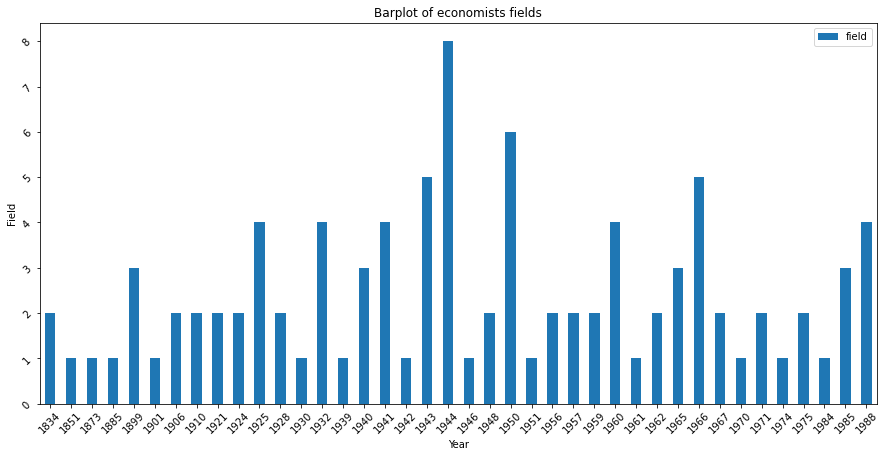

In [32]:
df1= (df.groupby(by=['year'])
.count()
.plot(kind="bar",figsize=(15,7)))
plt.ylabel('Field')
plt.xlabel('Year')
plt.title('Barplot of economists fields')
# plt.gcf().set_size_inches(50, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50,10])
ax = p1.add_subplot(111)
# Set the x-axis limit
# ax.set_xlim(-1,150)
# ax.set_ylim(-1,30)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=10, rotation=45)
plt.show()

In [12]:
m = df.to_numpy()
m

array([['Economics', '1834'],
       ['Marginalism', '1834'],
       ['Political economics', '1851'],
       ['Social economics', '1873'],
       ['Macroeconomics', '1885'],
       ['Economics', '1899'],
       ['Ethics', '1899'],
       ['Macroeconomics', '1899'],
       ['Development economics', '1901'],
       ['Urban economics', '1906'],
       ['Regional science', '1906'],
       ['Economics', '1910'],
       ['Law', '1910'],
       ['Mathematical economics', '1921'],
       ['Socialist economics', '1921'],
       ['Economic history', '1924'],
       ['Transportation economics', '1924'],
       ['Economics', '1925'],
       ['Monetary economics', '1925'],
       ['Macroeconomics', '1925'],
       ['Monetarism', '1928'],
       ['Development economics', '1928'],
       ['Economics', '1930'],
       ['Economics', '1932'],
       ['Economics', '1932'],
       ['Mathematics', '1932'],
       ['Mathematics', '1932'],
       ['Statistics', '1939'],
       ['Political economy', '1940'],


In [62]:
Year = [l[1] for l in m]
field = [l[0] for l in m]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


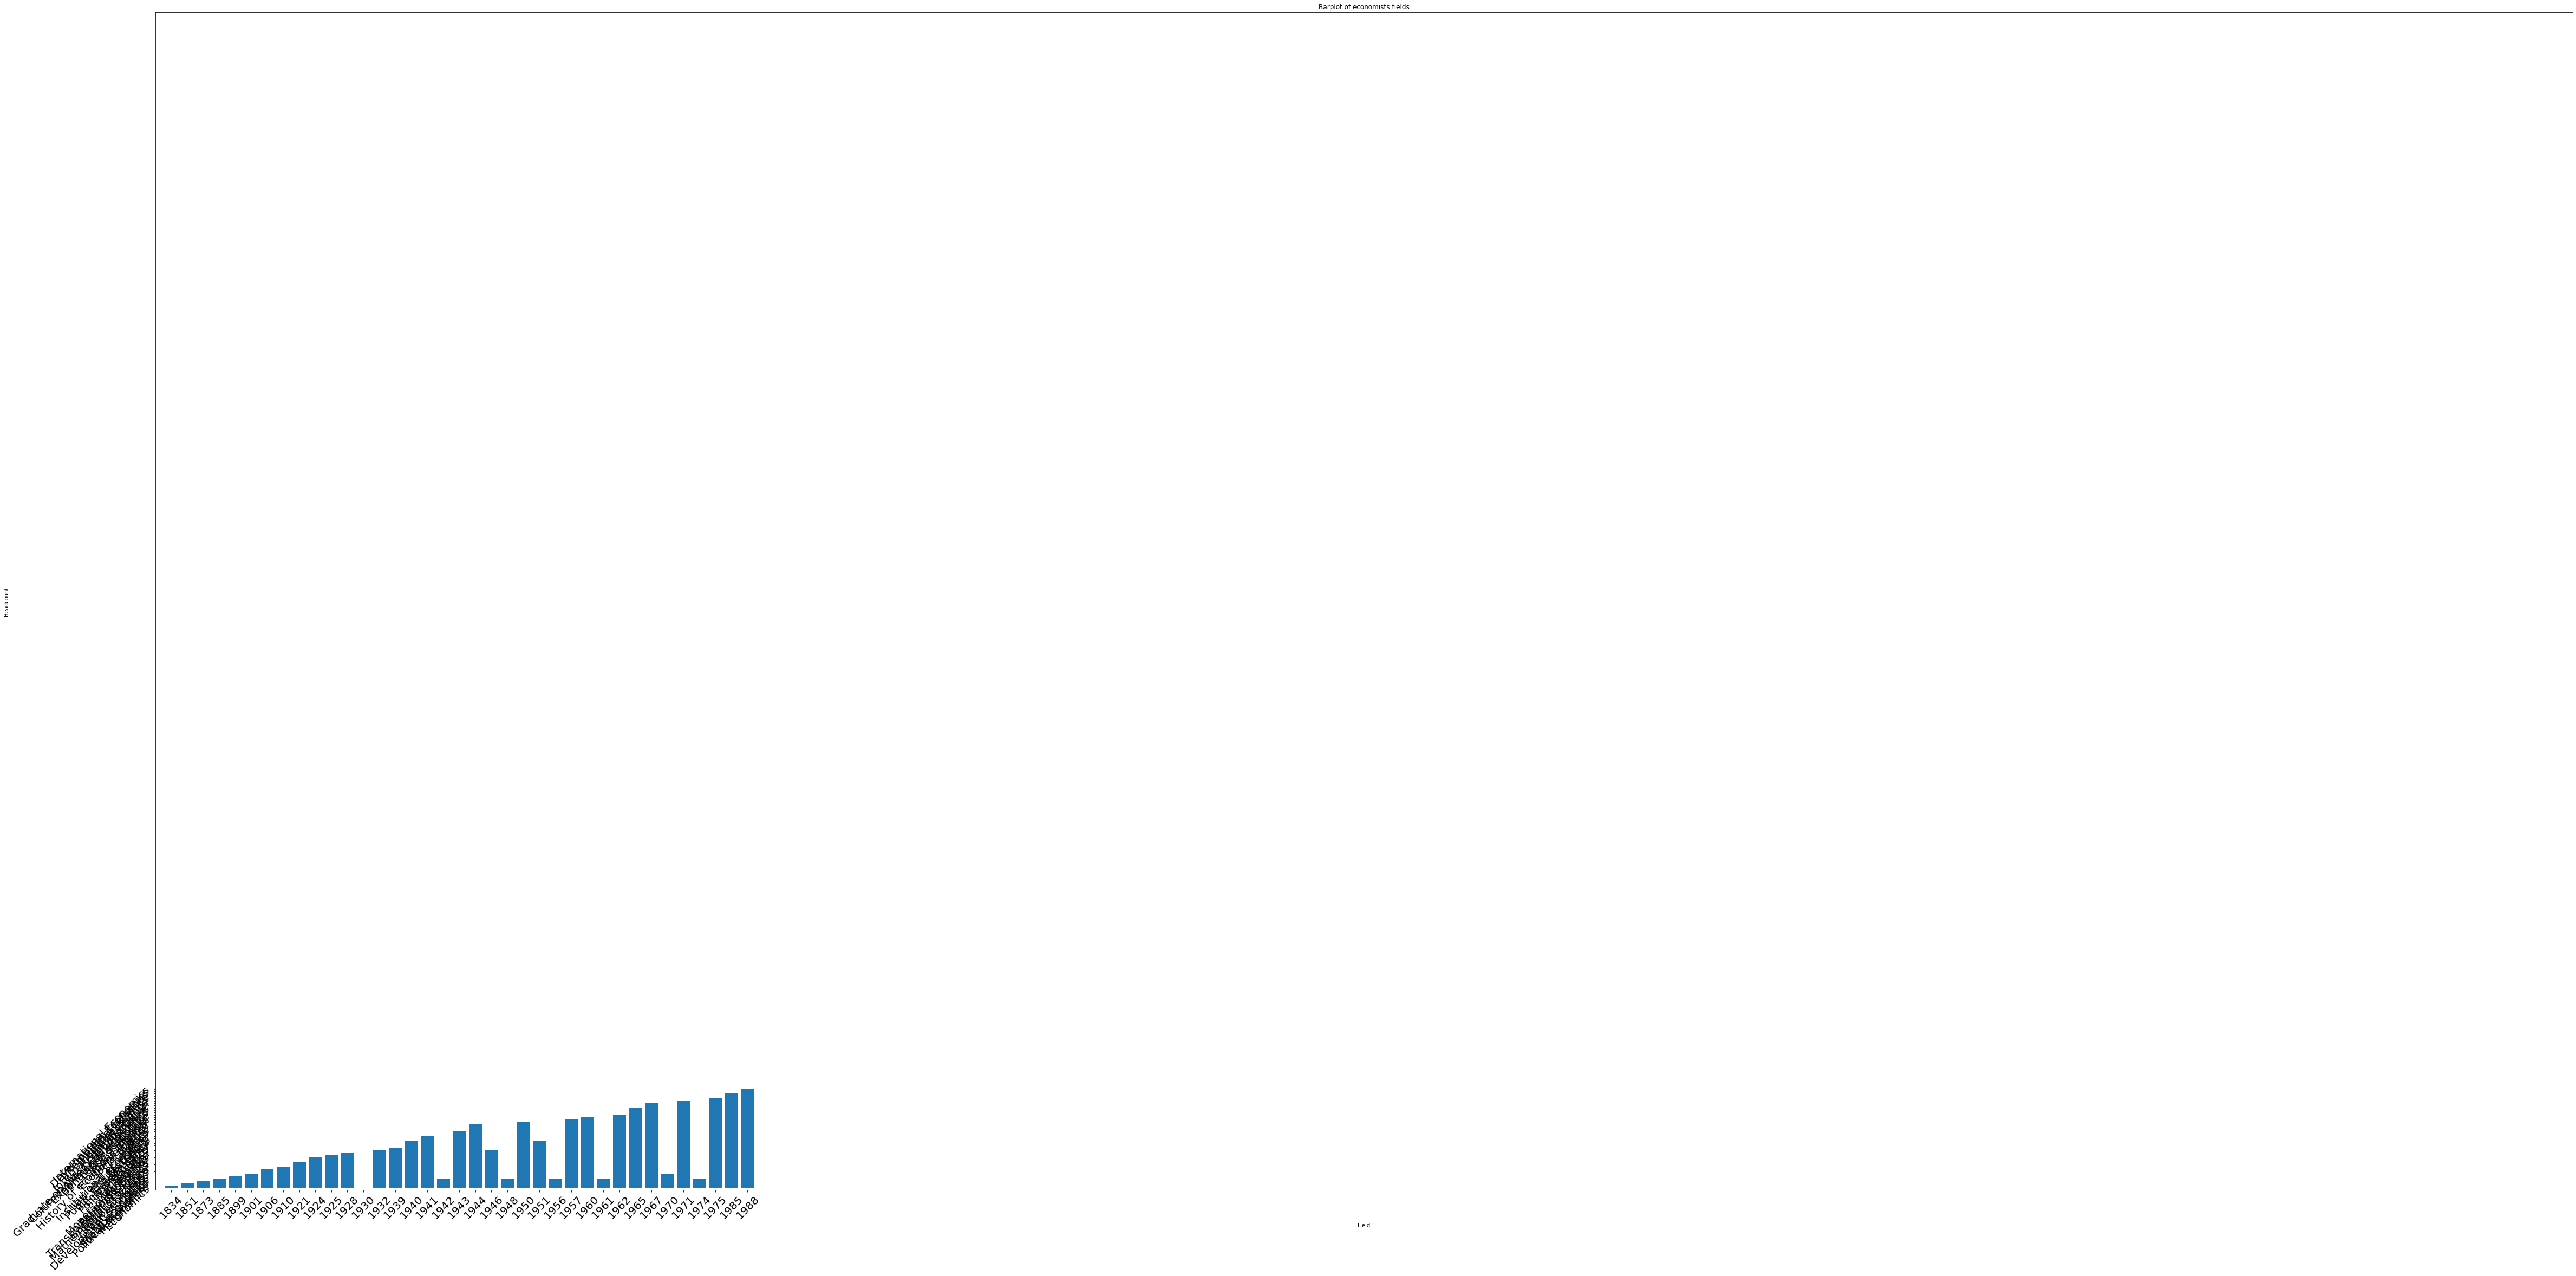

In [64]:
# Barplot of economists fields
eff = [l[1] for l in m]
objects = [l[0] for l in m]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(80, 40)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50, 3])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,150)
ax.set_ylim(-1,500)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=20, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=20, rotation=45)
plt.show()

In [15]:
grouped= df.groupby['Year', 'field'], as_index=False['name'].count()
grouped.columns= ['Year']
grouped

TypeError: 'bool' object is not subscriptable